In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
%%R
library(treemap)

In [11]:
%%R

df_rec_totals <- read_csv("recipients-totals.csv")
df_rec_year <- read_csv("recipients-year.csv")
df_purpose <- read_csv("purpose-amount.csv")

Rows: 6664 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): recipient_parent
dbl (1): amount

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 15220 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): recipient_parent
dbl (2): award_first_year, amount

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1119 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): product_or_service_code_description, sum, count
dbl (1): sum_in_mil

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
%%R

df_rec_totals
# This can be a histogram/bubble chart/sth by company amount

# A tibble: 6,664 × 2
   recipient_parent                      amount
   <chr>                                  <dbl>
 1 1 NATION TECHNOLOGY CORP              24990 
 2 1 STOP ELECTRONICS CENTER  INC.        5219.
 3 1000 K  L.L.C.                        16699.
 4 1105 MEDIA INC                         6174 
 5 1301 K STREET LIMITED PARTNERSHIP      4995 
 6 1415 LOUISIANA  INC.                   3300 
 7 17TH ST. PHOTO SUPPLY  INC.          235360.
 8 1ST CALL PAINT CONTRACTORS LLC         9724 
 9 200 WEST ADAMS ASSOCIATES NF L.L.C.   28507 
10 2001 NUTRITION SERVICES INCORPORATED   6000 
# … with 6,654 more rows
# ℹ Use `print(n = ...)` to see more rows


In [7]:
%%R
df_rec_year
# This should be a ggplot chart 
# with multiple facet_wrapped chart 
# by year and another one by recipient.

# A tibble: 15,220 × 3
   recipient_parent                  award_first_year amount
   <chr>                                        <dbl>  <dbl>
 1 1 NATION TECHNOLOGY CORP                      2006 24990 
 2 1 STOP ELECTRONICS CENTER  INC.               2008  5219.
 3 1000 K  L.L.C.                                2007 12410 
 4 1000 K  L.L.C.                                2011  4289.
 5 1105 MEDIA INC                                2008  2799 
 6 1105 MEDIA INC                                2010  3375 
 7 1301 K STREET LIMITED PARTNERSHIP             2003  4995 
 8 1415 LOUISIANA  INC.                          2015  3300 
 9 17TH ST. PHOTO SUPPLY  INC.                   2006 15924.
10 17TH ST. PHOTO SUPPLY  INC.                   2007  7216 
# … with 15,210 more rows
# ℹ Use `print(n = ...)` to see more rows


In [12]:
%%R
df_purpose <- df_purpose[-1,]
df_purpose
# This can be represented in a waffle chart, 
# with the top 10-20 purposes

# A tibble: 1,118 × 4
   product_or_service_code_description                       sum   count sum_i…¹
   <chr>                                                     <chr> <chr>   <dbl>
 1 HOUSEKEEPING- GUARD                                       1067… 2820    10678
 2 SUPPORT- PROFESSIONAL: PROGRAM MANAGEMENT/SUPPORT         3103… 402      3103
 3 TRANSPORTATION/TRAVEL/RELOCATION- TRAVEL/LODGING/RECRUIT… 1775… 101      1776
 4 MEDICAL- GENERAL HEALTH CARE                              1090… 22       1090
 5 IT AND TELECOM- SYSTEMS DEVELOPMENT                       1057… 114      1058
 6 GUARD SERVICES                                            9698… 667       970
 7 IT AND TELECOM- OTHER IT AND TELECOMMUNICATIONS           7308… 265       731
 8 HOUSEKEEPING- FACILITIES OPERATIONS SUPPORT               4631… 156       463
 9 INFORMATION TECHNOLOGY SOFTWARE                           4305… 1769      431
10 SUPPORT- ADMINISTRATIVE: TRANSLATION AND INTERPRETING     3651… 291       365
# … wi

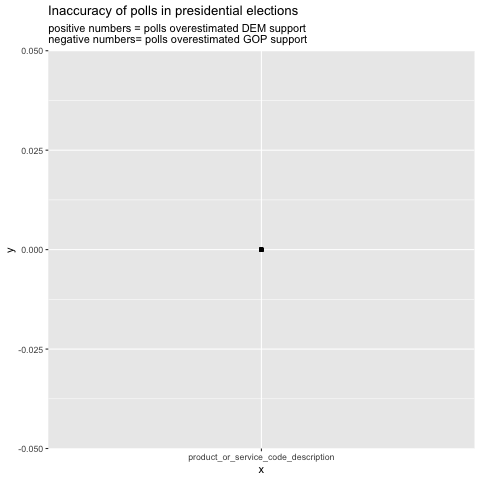

In [20]:
%%R

ggplot(df_rec_totals) +
    geom_point(aes(x="product_or_service_code_description", y=0), alpha=.5) +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )